# Fermi Hubbard Ground State Energy Estimation with Quantum Circuits

Consider the two orbital tight binding Fermi Hubbard Model for cuprate superconductors (seen for example [here](http://sces.phys.utk.edu/publications/Pub2011/7-FOP-11107-ED.pdf)) on a square lattice:

\begin{equation}
\begin{split}
    H_{TB} & = -t_1 \sum_{i,\sigma} \left( d^{\dagger}_{i,x,\sigma}d_{i+\hat{y},x,\sigma} +  d^{\dagger}_{i,y,\sigma}d_{i+\hat{x}, y, \sigma} + h.c. \right) \\
           & -t_2 \sum_{i,\sigma} \left( d^{\dagger}_{i,x,\sigma}d_{i+\hat{x},x,\sigma} +  d^{\dagger}_{i,y,\sigma}d_{i+\hat{y}, y, \sigma} + h.c. \right) \\
           & -t_3 \sum_{i,\hat{\mu}, \hat{\nu},\sigma} \left( d^{\dagger}_{i,x,\sigma}d_{i+\hat{\mu} + \hat{\nu},x,\sigma} +  d^{\dagger}_{i,y,\sigma}d_{i+\hat{\mu} + \hat{\nu}, y, \sigma} + h.c. \right) \\
           & +t_4 \sum_{i,\sigma} \left( d^{\dagger}_{i,x,\sigma}d_{i+\hat{x}+\hat{y},y,\sigma} +  d^{\dagger}_{i,y,\sigma}d_{i+\hat{x}+\hat{y},x,\sigma} + h.c. \right) \\
           & -t_4 \sum_{i,\sigma} \left( d^{\dagger}_{i,x,\sigma}d_{i+\hat{x}-\hat{y},y,\sigma} +  d^{\dagger}_{i,y,\sigma}d_{i+\hat{x}-\hat{y},x,\sigma} + h.c. \right) \\
           & -\mu \sum_{i} \left( n_{i}^{x} + n_{i}^{y} \right)
\end{split}
\end{equation}

where $t_1 = -1.0, t_2 = 1.3, t_3 = t_4 = -0.85$ with operators $d^{\dagger}_{i,\alpha,\sigma}$ and $d_{i,\alpha,\sigma}$ respectively create or annihilate electrons on an atom at site $i$, with orbital $\alpha$, and spin $\sigma$.  The operator $n^{\alpha}_{i}$ represents the number operator of an atom at a given orbital, i.e. $n^x_i = \sum_{\sigma} \left( d^{\dagger}_{i,x,\sigma} d_{i,x,\sigma} \right)$. The indices in the Hamiltonian are assigned in the following manner: the index $i$ will correspond to a 2-tuple $(m,n)$ indicating the x and y coordinates of the atom in the lattice.  Since there are 2 orbitals, $\alpha \in \{x,y\}$.  Lastly, $\sigma \in \{\uparrow, \downarrow \}$.  For the sake of simplicity of coding, we will remap these labels to integer values, meaning we will assign indices $m \in L_x, n \in L_y, a \in \mathbb{Z}^2, s \in \mathbb{Z}^2$ where $L_x$ is the $x$ dimension of the square lattice, and $L_y$ is the $y$ dimension of the square lattice.  In the summations, $\hat{x}$ and $\hat{y}$ correspond to adjacent sites in the lattice, rather than the orbitals.  The summation over unit vectors $\hat{\mu}$ and $\hat{\nu}$ correspond to the summing over unit vectors in all 8 cardinal and intercardinal directions without double counting.

In [1]:
import time
import numpy as np
from qca.utils.utils import circuit_estimate
from pyLIQTR.PhaseEstimation.pe import PhaseEstimation
from networkx import get_node_attributes, draw, draw_networkx_edge_labels
from qca.utils.hamiltonian_utils import generate_two_orbital_nx, nx_to_two_orbital_hamiltonian

/Users/jonhas/anaconda3/lib/python3.11/site-packages/attr/_make.py:918: RuntimeWarning: Running interpreter doesn't sufficiently support code object introspection.  Some features like bare super() or accessing __class__ will not work with slotted classes.
  set_closure_cell(cell, cls)


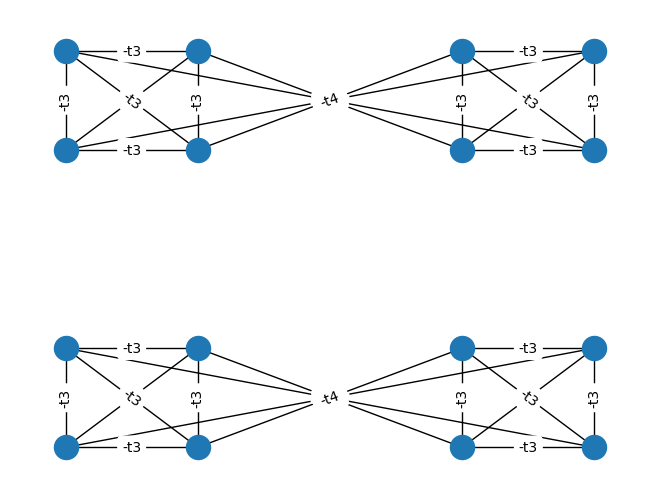

In [2]:
g_example = generate_two_orbital_nx(2,2)
pos = get_node_attributes(g_example, 'pos')
edge_labels = dict([((n1, n2), d['label']) for n1, n2, d in g_example.edges(data=True)]);
draw(g_example, pos)
draw_networkx_edge_labels(g_example,pos, edge_labels = edge_labels);

In [3]:
t1 = -1
t2 = 1.3
t3 = 0.85
t4 = 0.85
mu = 1
nx_to_two_orbital_hamiltonian(g_example, t1, t2, t3, t4, mu)

-1.0 [0^ 0] +
-0.85 [0^ 4] +
-0.85 [0^ 8] +
-0.85 [0^ 12] +
0.85 [0^ 14] +
-1.0 [1^ 1] +
-0.85 [1^ 5] +
-0.85 [1^ 9] +
-0.85 [1^ 13] +
0.85 [1^ 15] +
-1.0 [2^ 2] +
-0.85 [2^ 6] +
-0.85 [2^ 10] +
0.85 [2^ 12] +
-0.85 [2^ 14] +
-1.0 [3^ 3] +
-0.85 [3^ 7] +
-0.85 [3^ 11] +
0.85 [3^ 13] +
-0.85 [3^ 15] +
-0.85 [4^ 0] +
-1.0 [4^ 4] +
-0.85 [4^ 8] +
-0.85 [4^ 10] +
-0.85 [4^ 12] +
-0.85 [5^ 1] +
-1.0 [5^ 5] +
-0.85 [5^ 9] +
-0.85 [5^ 11] +
-0.85 [5^ 13] +
-0.85 [6^ 2] +
-1.0 [6^ 6] +
-0.85 [6^ 8] +
-0.85 [6^ 10] +
-0.85 [6^ 14] +
-0.85 [7^ 3] +
-1.0 [7^ 7] +
-0.85 [7^ 9] +
-0.85 [7^ 11] +
-0.85 [7^ 15] +
-0.85 [8^ 0] +
-0.85 [8^ 4] +
-0.85 [8^ 6] +
-1.0 [8^ 8] +
-0.85 [8^ 12] +
-0.85 [9^ 1] +
-0.85 [9^ 5] +
-0.85 [9^ 7] +
-1.0 [9^ 9] +
-0.85 [9^ 13] +
-0.85 [10^ 2] +
-0.85 [10^ 4] +
-0.85 [10^ 6] +
-1.0 [10^ 10] +
-0.85 [10^ 14] +
-0.85 [11^ 3] +
-0.85 [11^ 5] +
-0.85 [11^ 7] +
-1.0 [11^ 11] +
-0.85 [11^ 15] +
-0.85 [12^ 0] +
0.85 [12^ 2] +
-0.85 [12^ 4] +
-0.85 [12^ 8] +
-1.0 [12^ 12] +
-0.

In [4]:
g_current_limit = generate_two_orbital_nx(6,7)
g_ideal = generate_two_orbital_nx(10,10)

##### START UNCOMMENT FOR TESTING
#n_test = 2
#g_current_limit = generate_two_orbital_nx(n_test,n_test)  
#g_ideal = generate_two_orbital_nx(n_test,n_test)
##### END UNCOMMENT FOR TESTING
n_qubits_current_limit = len(g_current_limit)
n_qubits_ideal = len(g_ideal)

In [5]:
ham_current_limit = nx_to_two_orbital_hamiltonian(g_current_limit,t1,t2,t3,t4,mu)
ham_ideal = nx_to_two_orbital_hamiltonian(g_ideal,t1,t2,t3,t4,mu)
trotter_order_current_limit = 2
trotter_steps_current_limit = 1

trotter_order_ideal = 2
trotter_steps_ideal = 1

#note that we would actually like ~10 bits of precision, it just takes a really long time to run
bits_precision_ideal = 1
bits_precision_current_limit = 1

current_limit_args = {
    'trotterize' : True,
    'mol_ham'    : ham_current_limit,
    'ev_time'    : 1,
    'trot_ord'   : trotter_order_current_limit,
    'trot_num'   : trotter_steps_current_limit
}

ideal_args = {
    'trotterize' : True,
    'mol_ham'    : ham_ideal,
    'ev_time'    : 1,
    'trot_ord'   : trotter_order_ideal,
    'trot_num'   : trotter_steps_ideal
}

In [6]:
E_min_ideal = -len(ham_ideal.terms)
E_max_ideal = 0
ideal_omega = E_max_ideal-E_min_ideal
t_ideal = 2*np.pi/ideal_omega
ideal_phase_offset = E_max_ideal*t_ideal

E_min_current_limit = -len(ham_current_limit.terms)
E_max_current_limit = 0
limited_omega = E_max_current_limit-E_min_current_limit
limited_t = 2*np.pi/limited_omega
limited_phase_offset = E_max_current_limit*limited_t

init_state_ideal = [0] * n_qubits_ideal
init_state_current_limit = [0] * n_qubits_current_limit

print('starting')
t0 = time.perf_counter()
gse_inst_current_limit = PhaseEstimation(
    precision_order=bits_precision_current_limit,
    init_state=init_state_current_limit,
    phase_offset=limited_phase_offset,
    include_classical_bits=False, # Do this so print to openqasm works
    kwargs=current_limit_args)
gse_inst_current_limit.generate_circuit()
t1 = time.perf_counter()
print(f'current limit time to generate high level: {t1 - t0}')

t0 = time.perf_counter()
gse_inst_ideal = PhaseEstimation(
    precision_order=bits_precision_ideal,
    init_state=init_state_ideal,
    phase_offset=ideal_phase_offset,
    include_classical_bits=False, # Do this so print to openqasm works
    kwargs=ideal_args)
gse_inst_ideal.generate_circuit()
t1 = time.perf_counter()
print(f'ideal time to generate high level: {t1 - t0}')

gse_circuit_ideal = gse_inst_ideal.pe_circuit
gse_circuit_current_limit = gse_inst_current_limit.pe_circuit

starting
current limit time to generate high level: 0.18624829200052773
ideal time to generate high level: 0.9717117079999298


In [7]:
print('Estimating Ideal')
t0 = time.perf_counter()
circuit_estimate(gse_circuit_ideal,
                 outdir='GSE/',
                 circuit_name='ideal',
                 trotter_steps=trotter_steps_ideal,
                 write_circuits=True)
t1 = time.perf_counter()
print(f'Time to estimate Ideal: {t1-t0}')

print('Estimating Current Limit')
t0 = time.perf_counter()
circuit_estimate(gse_circuit_current_limit,
                 outdir='GSE/',
                 circuit_name='current_limit',
                 trotter_steps=trotter_steps_current_limit,
                 write_circuits=True)
t1 = time.perf_counter()
print(f'Time to estimate Current Limit: {t1-t0}')

Estimating Ideal
   Time to decompose high level <class 'cirq.ops.common_gates.HPowGate circuit: 0.00017020799896272365 seconds 
   Time to transform decomposed <class 'cirq.ops.common_gates.HPowGate circuit to Clifford+T: 2.499999936844688e-05 seconds
   Time to decompose high level <class 'cirq.ops.identity.IdentityGate circuit: 6.779099931009114e-05 seconds 
   Time to transform decomposed <class 'cirq.ops.identity.IdentityGate circuit to Clifford+T: 4.666999302571639e-06 seconds
   Time to decompose high level <class 'pyLIQTR.PhaseEstimation.pe_gates.PhaseOffset circuit: 0.0001875830002973089 seconds 
   Time to transform decomposed <class 'pyLIQTR.PhaseEstimation.pe_gates.PhaseOffset circuit to Clifford+T: 0.00044433299990487285 seconds
   Time to decompose high level <class 'pyLIQTR.PhaseEstimation.pe_gates.Trotter_Unitary circuit: 162.3568995000005 seconds 
   Time to transform decomposed <class 'pyLIQTR.PhaseEstimation.pe_gates.Trotter_Unitary circuit to Clifford+T: 94.94069541